In [ ]:
git init
git add README.md  
git add GeeksForGeeks.ipynb
git commit -m "notebook first commit" 
git remote add origin https://github.com/{Your repo}/GeeksForGeeks.git 
git push -u origin master 

In [122]:
import pandas as pd ##import pandas to import the dataframe
import numpy as np ##import numpy to work with arrays
import seaborn as sns ##import seaborn for plotting data
sns.set(color_codes = True) ##seaborn color formatting
import matplotlib.pyplot as plt ##import matplotlib for plotting data
%matplotlib inline 

In [31]:
cardio = pd.read_csv('CardioGoodFitness.csv') 
##import the dataset

## Data Exploration

In [117]:
cardio.head()
##Getting an idea of what the dataframe looks like

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [118]:
cardio.describe()
##Brief overview of the data range for all numerical variables

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [116]:
cardio.info()
##Identified 3 categorical variables (product, gender, marital status) that will not appear in correlation or pairplot analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


## Correlation

Here we will investigate the relationship and correlations between numerical variables. 
Pairplot will give a quick summary of the data while heatmap will visually show the correlation strength between variables.

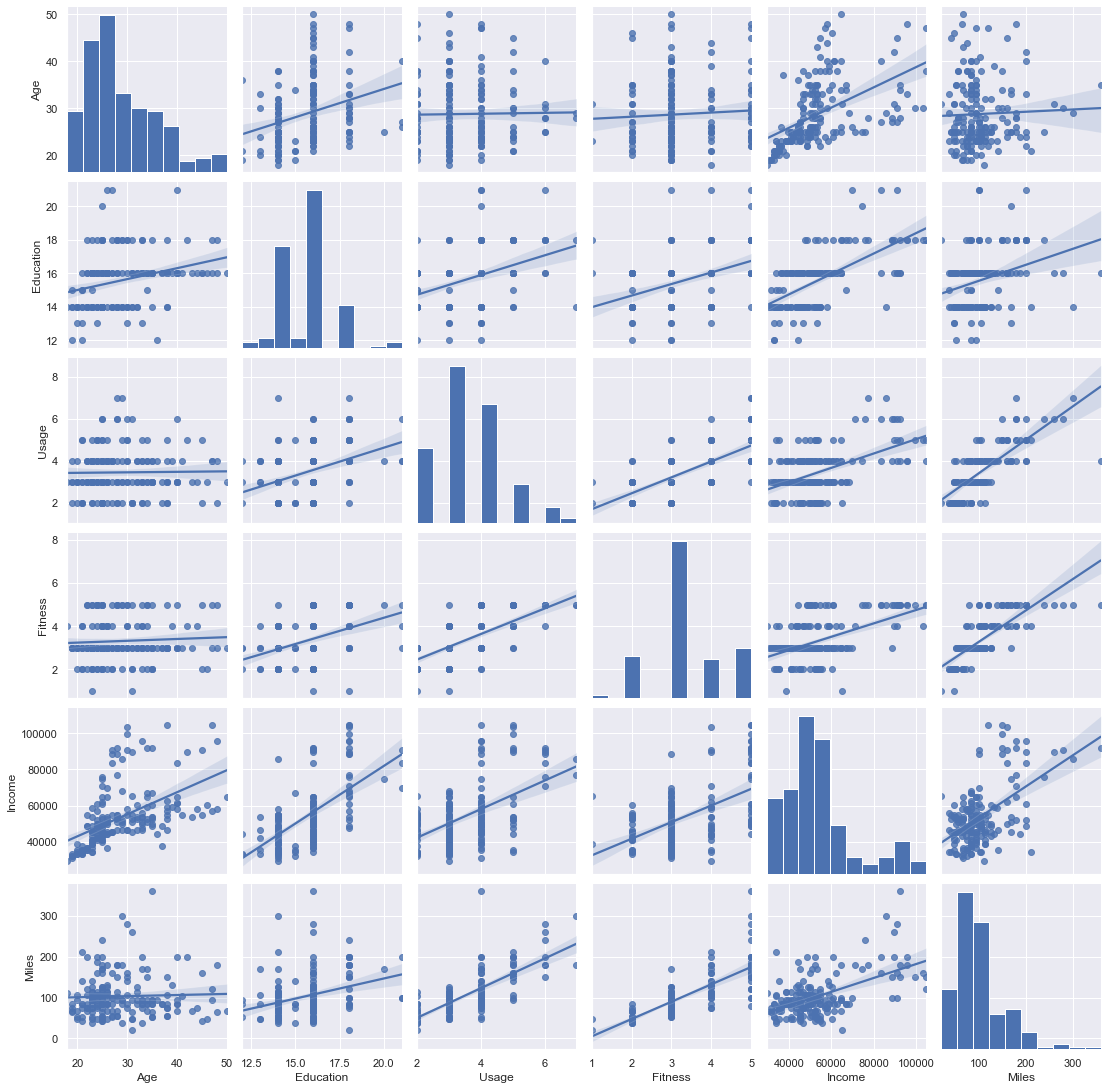

In [69]:
sns.pairplot(cardio, kind = 'reg')
##Plotting the relationships between numerical variables

In [115]:
cardio.corr() 
##Looking at the correlation of the numerical data

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


<AxesSubplot:>

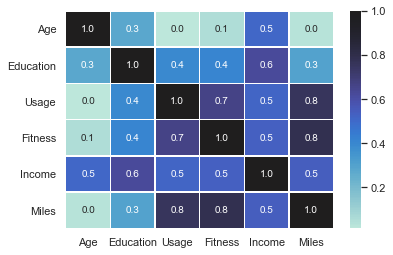

In [114]:
sns.heatmap(cardio.corr(), annot = True, linewidth = .5, fmt = '.1f', center = 1) 
##Using a heat map to better see the correlation relationship of the data

# Usage v Fitness (0.7 coeff)

Here we are exploring the relationship between the usage and the fitness of the customer. We will break out the data by marital status, gender, and product.

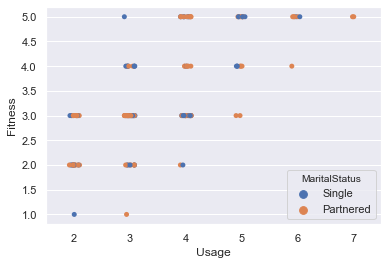

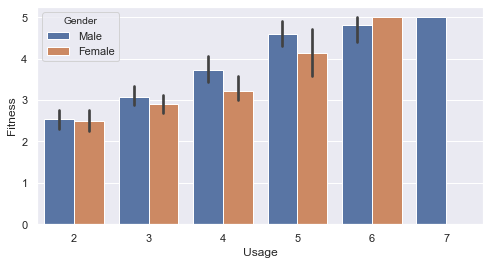

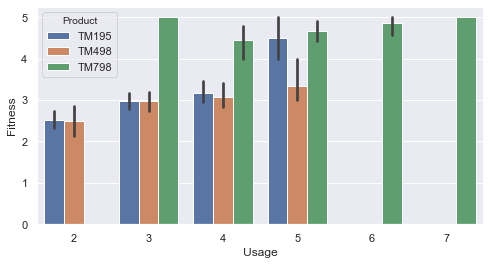

In [103]:
##Plotting the relationship between usage and fitness rating by marital status; Jittering to see overlapping data points.
sns.stripplot(cardio['Usage'], cardio['Fitness'], hue = cardio['MaritalStatus'], jitter = True)
##Plotting the relationship between usage and fitness rating by gender
plt.figure(figsize=(8,4))
ax = sns.barplot(x = 'Usage', y = 'Fitness', data = cardio, hue = 'Gender')
##Plotting the relationship between usage and fitness rating by product
plt.figure(figsize=(8,4))
ax = sns.barplot(x = 'Usage', y = 'Fitness', data = cardio, hue = 'Product')

## Conclusion: 

1. Marital status does not seem to have an impact on the fitness or usage.
2. Male customers seem to have higher fitness rating and more usage.
3. Customers who use TM798 have the most usage and the highest fitness ratings compared to the other models.

# Usage v Miles (0.8 coeff)

Here we are exploring the relationship between the usage and number of expected miles ran. We will break out the data by marital status, gender, and product.

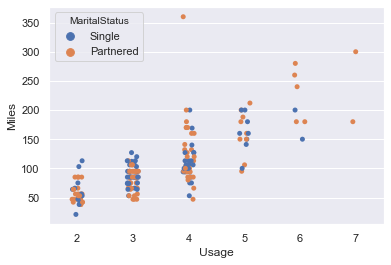

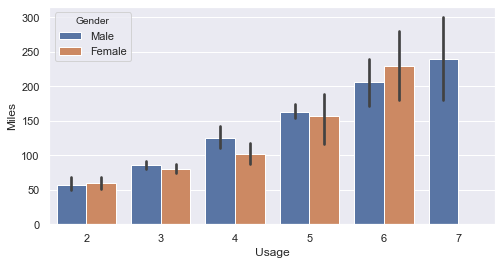

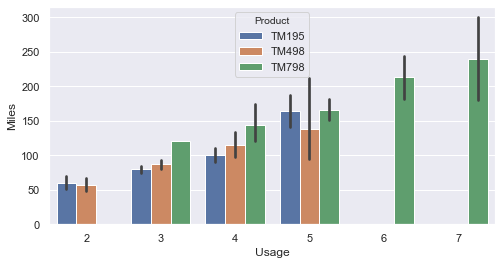

In [123]:
##Plotting the relationship between the usage and expected miles run by marital status; Jittering to easier see overlapping data points.
sns.stripplot(cardio['Usage'], cardio['Miles'], hue = cardio['MaritalStatus'], jitter = True)
##Plotting the relationship between the usage and expected miles run by gender
plt.figure(figsize=(8,4))
ax = sns.barplot(x = 'Usage', y = 'Miles', data = cardio, hue = 'Gender')
##Plotting the relationship between the usage and expected miles run by the product
plt.figure(figsize=(8,4))
ax = sns.barplot(x = 'Usage', y = 'Miles', data = cardio, hue = 'Product')

## Conclusion: 

1. Partnered customers expect to have higher usage and expect to run more miles than single customers.
2. Male customers expect to run more miles rating and expect to have more usage than female customers.
3. Customers of TM798 expect to have the most usage and expect to run the most miles.

# Fitness v Miles (0.8 coeff)

Here we look at the relationsheep between the fitness rating and expected miles by martial status, gender, and product.

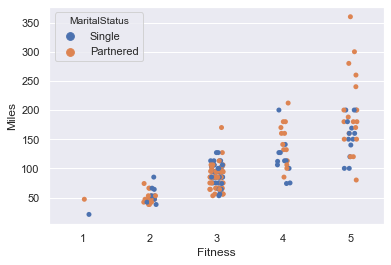

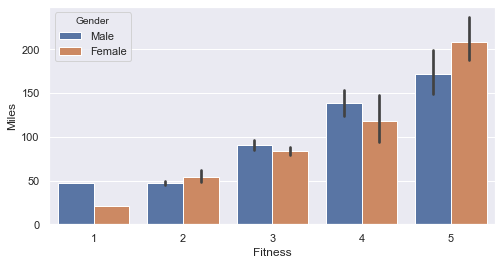

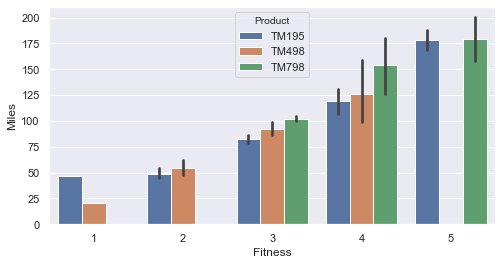

In [110]:
##Plotting the relationship between fitness and expected miles ran by marital status
sns.stripplot(cardio['Fitness'], cardio['Miles'], hue = cardio['MaritalStatus'])
##Plotting the relationship between fitness and expected miles by gender
plt.figure(figsize=(8,4))
ax = sns.barplot(x = 'Fitness', y = 'Miles', data = cardio, hue = 'Gender')
##Plotting the relationship between fitness and expected miles by gender
plt.figure(figsize=(8,4))
ax = sns.barplot(x = 'Fitness', y = 'Miles', data = cardio, hue = 'Product')

## Conclusion: 

1. Partnered customers expect to run more miles than single customers.
2. Customers who have a higher fitness rating expect to run more miles regardless of gender.
3. Customers of TM798 are customers with a higher fitness rating and expect to more miles.

# Income relationships

Here we look at relationship between income and product as well as marital status that we couldn't see in previous analysis.

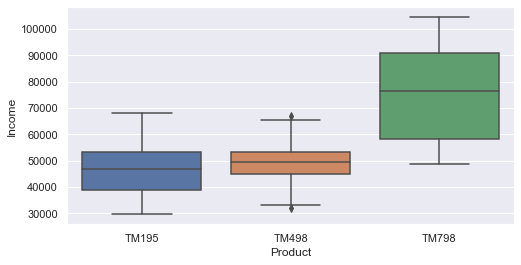

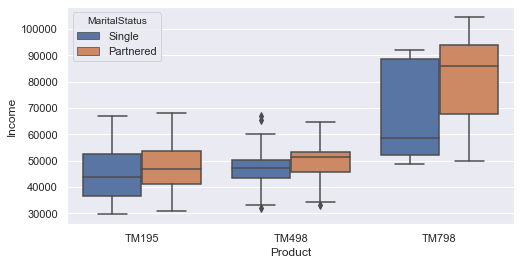

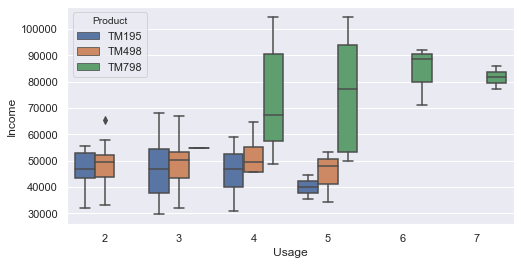

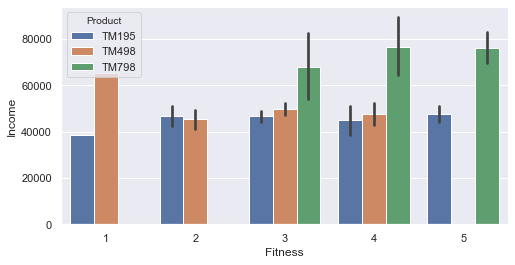

In [138]:
##Plotting the relationship between the product and income
plt.figure(figsize=(8,4))
ax = sns.boxplot(x = 'Product', y = 'Income', data = cardio)
##Plotting the relationship between the product and income and breaking it out by marital status
plt.figure(figsize=(8,4))
ax = sns.boxplot(x = 'Product', y = 'Income', data = cardio, hue = 'MaritalStatus')
##Plotting the relationship between the product and income and breaking it out by marital status
plt.figure(figsize=(8,4))
ax = sns.boxplot(x = 'Usage', y = 'Income', data = cardio, hue = 'Product')
##Plotting the relationship between the product and income and breaking it out by marital status
plt.figure(figsize=(8,4))
ax = sns.barplot(x = 'Fitness', y = 'Income', data = cardio, hue = 'Product')

## Conclusion: 

1. Customers of TM798 have a higher income.
2. Partnered customers on average have a higher income and own TM798.
3. Most customers expect to use the product on average 5 times a week and have a wide range in income.
4. Customers with a fitness level of 3 and greater have higher income level and are customers of TM798.

# Miles relationships

Here we look at relationship between the expected miles run against gender, product, and marital status.

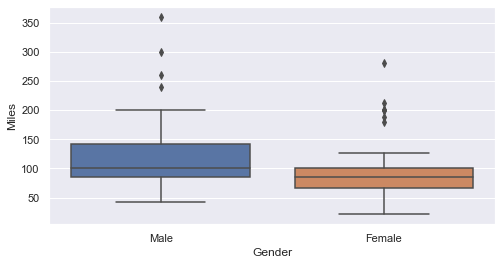

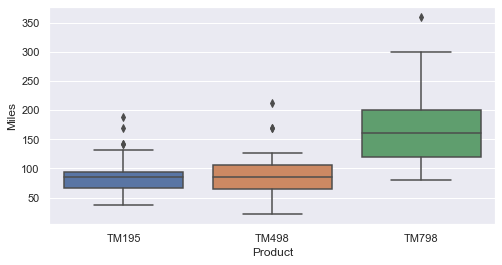

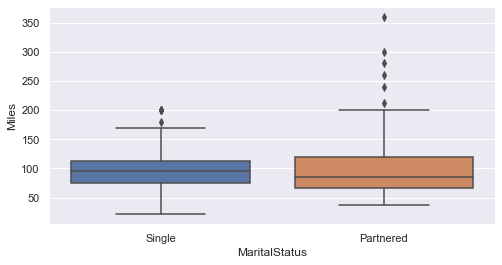

In [129]:
##Plotting the relationship between the gender and expected miles to run
plt.figure(figsize=(8,4))
ax = sns.boxplot(x = 'Gender', y = 'Miles', data = cardio)
##Plotting the relationship between the product and expected miles to run
plt.figure(figsize=(8,4))
ax = sns.boxplot(x = 'Product', y = 'Miles', data = cardio)
##Plotting the relationship between the marital status and expected miles to run
plt.figure(figsize=(8,4))
ax = sns.boxplot(x = 'MaritalStatus', y = 'Miles', data = cardio)

## Conclusion: 

1. Male customers on average expect to run more miles than female customers.
2. Customers of TM798 on average expect to run more miles.
3. Customers who are partnered expect to run more miles than customers who are single.